In [20]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import read_video

In [21]:
df = pd.read_csv('./movs/trimmed_IMG_7634_output_wasb.csv')
df = df[df['frame_number'] % 3 == 2].copy()
df = df.sort_values(by='frame_number').reset_index(drop=True)

df.head()

,frame_number,detected,x,y,confidence
0,2,0,0.0,0.0,0.0
1,5,0,0.0,0.0,0.0
2,8,0,0.0,0.0,0.0
3,11,0,0.0,0.0,0.0
4,14,0,0.0,0.0,0.0


In [23]:
def compute_vel(x_coords, y_coords):
    xn_prev = 0
    yn_prev = 0
    vels = []

    for xn, yn in zip(x_coords, y_coords):
        if xn == 0.0 and len(vels) > 0:
            vels.append(vels[-1])
        elif xn == 0.0 and len(vels) == 0:
            vels.append(0.0)
        else:
            vn = np.array([xn - xn_prev, yn - yn_prev])/ (1/30)
            vn = np.sqrt(np.dot(vn, vn))
            vels.append(vn)
            xn_prev = xn 
            yn_prev = yn

    return vels

# df_detected = df[df['detected'] == 1]
x_coords = df['x'].to_list()
y_coords = df['y'].to_list()

vels = compute_vel(x_coords, y_coords)

/var/folders/6l/_2s2w65s5211336jwv0l_mh80000gn/T/ipykernel_77147/4168118002.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


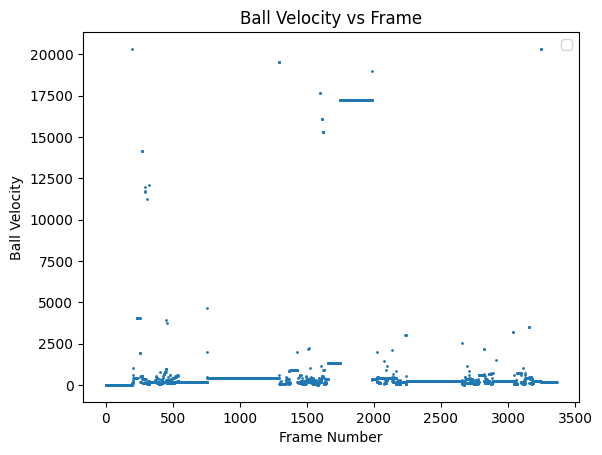

In [24]:
plt.scatter(np.arange(len(vels)) ,vels, s=1)
plt.title("Ball Velocity vs Frame")
plt.xlabel("Frame Number")
plt.ylabel("Ball Velocity")
plt.legend()
plt.show()

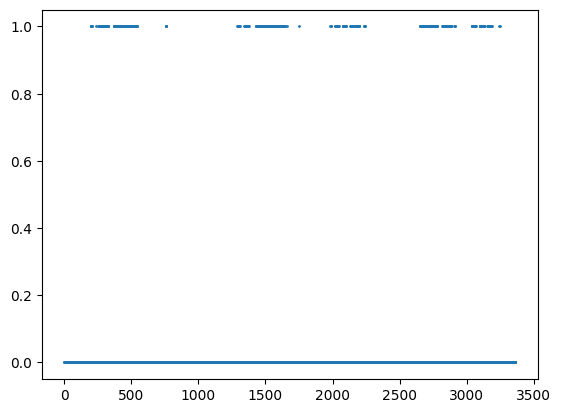

In [25]:
plt.scatter(np.arange(len(df)), df.detected, s=1)

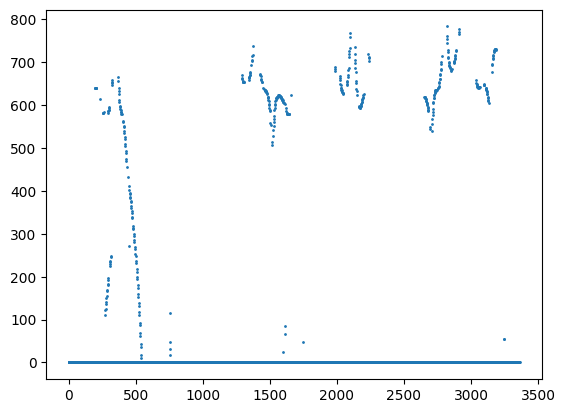

In [28]:
plt.scatter(np.arange(len(df.x)), df.x, s=1)

In [53]:
in_rally = False
rally_inds = []
stag_counter = 0
rally_counter = 0
stagnant_frame_count = 60
min_rally_frame_count = 30 * 2.5
next_rally_start = 0

for i, xpos in enumerate(x_coords):
    if in_rally:
        rally_counter += 1
        if xpos < 300 or xpos > 900:
            stag_counter += 1
            if stag_counter > stagnant_frame_count:
                if rally_counter > min_rally_frame_count:
                    rally_inds.append((next_rally_start, i))
                in_rally = False
                stag_counter = 0
                rally_counter = 0
        else:
            stag_counter = 0
    else:
       if xpos > 300 and xpos < 900:
            in_rally = True
            rally_counter += 1
            next_rally_start = i

In [54]:
rally_inds

[(197, 547), (1291, 1718), (1985, 2304), (2653, 2972), (3039, 3247)]

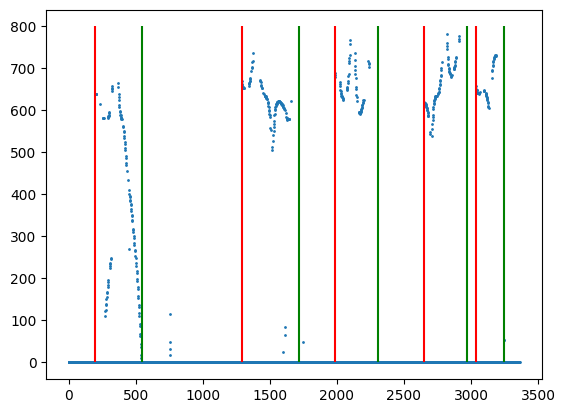

In [55]:
plt.scatter(np.arange(len(df.x)), df.x, s=1)
for rallies in rally_inds:
    plt.vlines(rallies[0], 0, 800, colors=['red'])
    plt.vlines(rallies[1], 0, 800, colors=['green'])
plt.show()

In [56]:
frames, fps = read_video('./movs/trimmed_IMG_7634.mov')

In [60]:
def video_from_frames(images, output_path, fps=30):
    height, width, layers = images[0].shape

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for image in images:
        out.write(image)

    out.release()

output_video_path = './movs/output_video_7634.mp4'

rally_frames = []
for sind, eind in rally_inds:
    rally_frames += frames[sind:eind]

video_from_frames(rally_frames, output_video_path, fps=30)

print(f"Video saved at: {output_video_path}")


Video saved at: ./movs/output_video_7634.mp4
